In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('./data/fire_theft.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df.head()

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


epoch:0, MSE = 2.660794973373413, theta0 = 0.0035714285913854837, theta1 = 0.012857142835855484
epoch:100, MSE = 4.184792518615723, theta0 = 0.25726762413978577, theta1 = 1.5906177759170532
epoch:200, MSE = 2.3038442134857178, theta0 = 0.4335135519504547, theta1 = 1.6315373182296753
epoch:300, MSE = 2.7529079914093018, theta0 = 0.5743774175643921, theta1 = 1.8359590768814087
epoch:400, MSE = 0.1462225317955017, theta0 = 0.6830431818962097, theta1 = 2.1874043941497803
epoch:500, MSE = 28.1815242767334, theta0 = 0.8569357991218567, theta1 = 2.455634593963623
epoch:600, MSE = 3.987833261489868, theta0 = 1.010863184928894, theta1 = 2.1874148845672607
epoch:700, MSE = 2.002584218978882, theta0 = 1.16791832447052, theta1 = 2.4372141361236572
epoch:800, MSE = 13.849727630615234, theta0 = 1.3032029867172241, theta1 = 2.0451724529266357
epoch:900, MSE = 0.2069053053855896, theta0 = 1.436038851737976, theta1 = 1.5431921482086182
epoch:1000, MSE = 1.9264072179794312, theta0 = 1.5957633256912231, 

epoch:8800, MSE = 2.5796148777008057, theta0 = 8.910616874694824, theta1 = 1.833530306816101
epoch:8900, MSE = 0.003547382541000843, theta0 = 8.992587089538574, theta1 = 1.8203577995300293
epoch:9000, MSE = 7.081327438354492, theta0 = 9.088926315307617, theta1 = 2.269989013671875
epoch:9100, MSE = 5.195751190185547, theta0 = 9.194185256958008, theta1 = 2.7613930702209473
epoch:9200, MSE = 0.014261686243116856, theta0 = 9.251655578613281, theta1 = 1.4214340448379517
epoch:9300, MSE = 4.0141425132751465, theta0 = 9.309511184692383, theta1 = 2.5863025188446045
epoch:9400, MSE = 1.2573281526565552, theta0 = 9.318589210510254, theta1 = 1.719096302986145
epoch:9500, MSE = 21.252355575561523, theta0 = 9.428506851196289, theta1 = 2.119990110397339
epoch:9600, MSE = 0.48000240325927734, theta0 = 9.417704582214355, theta1 = 2.0866405963897705
epoch:9700, MSE = 7.425581455230713, theta0 = 9.486010551452637, theta1 = 2.0264298915863037
epoch:9800, MSE = 3.568338394165039, theta0 = 9.50313949584961

epoch:17600, MSE = 0.039200544357299805, theta0 = 13.1322660446167, theta1 = 1.2192516326904297
epoch:17700, MSE = 0.06878475844860077, theta0 = 13.180708885192871, theta1 = 1.305755376815796
epoch:17800, MSE = 3.089836597442627, theta0 = 13.193263053894043, theta1 = 1.2131816148757935
epoch:17900, MSE = 0.0015664614038541913, theta0 = 13.22782039642334, theta1 = 1.1347631216049194
epoch:18000, MSE = 0.5083006024360657, theta0 = 13.28964900970459, theta1 = 1.2744498252868652
epoch:18100, MSE = 1.076485276222229, theta0 = 13.365665435791016, theta1 = 1.2500134706497192
epoch:18200, MSE = 16.876832962036133, theta0 = 13.389453887939453, theta1 = 2.178072929382324
epoch:18300, MSE = 7.333962917327881, theta0 = 13.396994590759277, theta1 = 1.7189061641693115
epoch:18400, MSE = 0.06402761489152908, theta0 = 13.431587219238281, theta1 = 1.079870343208313
epoch:18500, MSE = 0.8704618811607361, theta0 = 13.501276016235352, theta1 = 2.012417793273926
epoch:18600, MSE = 0.15616072714328766, thet

epoch:26300, MSE = 0.1579872965812683, theta0 = 15.262802124023438, theta1 = 1.081876277923584
epoch:26400, MSE = 0.20181983709335327, theta0 = 15.2683744430542, theta1 = 1.0456960201263428
epoch:26500, MSE = 0.20704101026058197, theta0 = 15.289100646972656, theta1 = 1.5752946138381958
epoch:26600, MSE = 25.67626953125, theta0 = 15.290451049804688, theta1 = 1.612430453300476
epoch:26700, MSE = 0.05794825404882431, theta0 = 15.278779029846191, theta1 = 1.1551461219787598
epoch:26800, MSE = 8.274514402728528e-05, theta0 = 15.359899520874023, theta1 = 2.1865694522857666
epoch:26900, MSE = 0.5460634231567383, theta0 = 15.329330444335938, theta1 = 1.7432072162628174
epoch:27000, MSE = 0.6303176879882812, theta0 = 15.362767219543457, theta1 = 1.920466423034668
epoch:27100, MSE = 3.550675630569458, theta0 = 15.33443546295166, theta1 = 1.3277114629745483
epoch:27200, MSE = 0.6737342476844788, theta0 = 15.361795425415039, theta1 = 1.8230654001235962
epoch:27300, MSE = 16.874509811401367, theta0

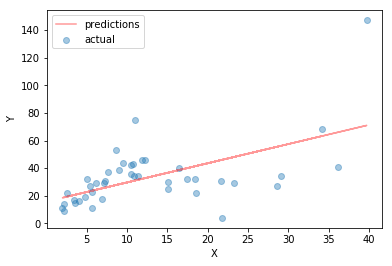

In [4]:
n_samples = df['X'].shape[0]

X = tf.placeholder(name='X', dtype='float32')
Y = tf.placeholder(name='Y', dtype='float32')

theta0 = tf.Variable(0.0, 'theta0')
theta1 = tf.Variable(0.0, 'theta1')


mse = tf.multiply((1.0/(2.0*n_samples)), tf.reduce_sum(tf.pow((X*theta1 + theta0) - Y, 2)))
mse_summary = tf.summary.scalar(tensor=mse, name='loss_summary')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(mse)

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/problem4/mse_summary')
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(30000):
        index = np.random.choice(range(n_samples-1), 1)
        train_instance = df.iloc[index]
        feed_dict = {X: train_instance['X'], Y: train_instance['Y']}
        sess.run(optimizer, feed_dict)
        summary = sess.run(mse_summary, {X: df['X'],Y: df['Y']})
        writer.add_summary(summary, step)
        
        if(step % 100 == 0):
            print("epoch:{0}, MSE = {1}, theta0 = {2}, theta1 = {3}".format(step, sess.run(mse, feed_dict), sess.run(theta0), sess.run(theta1)))
    
    plt.scatter(df['X'], df['Y'], alpha=0.4, label='actual')
    plt.plot(df['X'], sess.run(X*theta1 + theta0, {X: df['X'],Y: df['Y']}), alpha=0.4, label='predictions', c='r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()